# Probabilidade e curva normal

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
camaras = pd.read_csv('https://github.com/jtrecenti/main-cdad2/releases/download/data/camaras.csv')

## Introdução

Até agora, fizemos a revisão de estatísticas básicas: proporções, média, mediana, desvio padrão. Depois, vimos um pouco sobre amostragem e suas técnicas. Está chegando a hora de unir as duas coisas: como que, a partir de proporções, médias, medianas e desvios padrão calculadas em uma amostra, podemos fazer afirmações sobre a população?

Algumas coisas das apostilas passadas foram colocadas sem detalhe. Por exemplo, a fórmula do desvio padrão, a distribuição normal e aquele valor $z$ que apareceu na fórmula da amostra.

Para amarrar tudo isso, precisamos discutir sobre **probabilidade**. A probabilidade é a ferramenta matemática que utilizamos para fazer afirmações sobre o desconhecido a partir de uma amostra. É a base da inferência estatística.

Como este não é um curso de estatística, vamos discutir probabilidade de forma intuitiva, sem mostrar a matemática por trás disso (que é linda, mas fica para outra oportunidade!). Aqui, veremos aspectos pertinentes aos nossos estudos, o mínimo necessário para trabalhar com estatística inferencial.

Continuaremos com o case das câmaras criminais. Dessa vez, nosso objetivo é estimar a probabilidade de perder um caso criminal em duas situações: antes e depois de saber em qual câmara meu caso será julgado.


## Conectando os conceitos

Você sabia que estava trabalhando com probabilidades desde o começo da disciplina? Ocorre que esses conceitos foram apresentados de forma mais prática, sem a formalização matemática. Por exemplo, quando falamos sobre a média, estamos falando sobre a soma das probabilidades de uma variável assumir certo valor, multiplicadas por esses valores (chamamos isso de *esperança matemática*). 

Mas vamos formalizar um pouco mais.

Partimos do conceito de **amostra**. A amostra é um subconjunto de observações da população. A partir dela, podemos calcular a média, a mediana, o desvio padrão, proporções, etc.

Essas medidas que resumem a amostra são chamadas de **estatísticas**. Isso mesmo, estatísticas. Por exemplo, a média é uma estatística. O desvio padrão é uma estatística. A proporção de casos ganhos é uma estatística. Tecnicamente, uma estatística é uma **função das observações da amostra**. Ou seja, a estatística não é um número, não é o valor calculado como a média, por exemplo. A estatística é a fórmula que calcula a média.

Na maioria das situações, as estatísticas estão relacionadas a um **parâmetro** de interesse. O parâmetro é uma **característica da população**. Por exemplo, a média na população, a o desvio padrão na população, etc. Geralmente, esses valores são desconhecidos, e descrevemos eles com letras gregas, como $\mu$ (média na população) e $\sigma$ (desvio padrão na população).

Chamamos uma estatística de **estimador** quando ela assume valores no mesmo **escopo de variação do parâmetro** (por exemplo). Por exemplo, a média da amostra é um estimador da média da população, pois assume valores no mesmo intervalo (no caso, qualquer número). O desvio padrão amostral é um estimador do desvio padrão da população, pois assume valores no mesmo intervalo (no caso, qualquer número positivo). A proporção de casos ganhos na amostra é um estimador da probabilidade de ganhar um caso na população (que varia entre 0 e 1). 

Como o estimador é uma estatística, ele também é uma função da amostra, uma fórmula a ser aplicada aos dados. O valor que sai dessa fórmula é chamado de **estimativa**.

Várias definições!! Respire.

Vimos até agora, então, **estimador**, que é um tipo especial de **estatística**. O estimador é só uma fórmula, uma função das observações da **amostra**. O valor que sai dessa fórmula é chamado de **estimativa**. E nós gostaríamos que essa estimativa fosse próxima do **parâmetro**.

Vamos a um exemplo no python, para analisar o tempo.


In [10]:
# obs: a base das câmaras que temos aqui é uma amostra da base completa, com 10 mil casos. A base completa tem mais de 500 mil.

# não sabemos a média populacional
media_populacional = np.nan

# exemplo de estatística: a soma dos valores
# ela não é um bom estimador da média populacional, concorda?
def exemplo_estatistica(x):
  return x.sum()

# esse é nosso estimador de média. Ele também é uma estatística
def estimador_media(x):
  return x.mean()

estimativa_media = estimador_media(camaras['tempo'])

Mas o parâmetro é desconhecido, então como verificar se a estimativa é próxima do parâmetro? No lugar disso, o que fazemos é estudar quais são as **proprieades do estimador**. Por exemplo, se ele é viesado, se ele é consistente, se ele é eficiente, etc. Não vamos discutir essas propriedades aqui, mas é importante saber que elas existem e que existem algumas propriedades desejáveis.

Para estudar as propriedades do estimador, a ideia é estudar quais valores ele pode assumir e qual a probabilidade dele assumir esses valores. Por exemplo, ao coletar uma amostra de 100 casos, qual seria a estimativa? Ao coletar mil amostras, como seria a distribuição das estimativas? É exatamente o que vimos no TCL da apostila sobre amostragem: os valores dessas estimativas ficam próximos de uma distribuição de probabilidades normal. 

O que é, então esse estimador? Ele é o que chamamos de **variável aleatória**. Uma variável aleatória é uma função que recebe um conjunto de eventos aleatórios (no caso, os eventos que originaram a amostra) e retorna um valor (no caso, a estimativa).

O que mais se faz na estatística é estudar essas tais variáveis aleatórias. Existem variáveis aleatórias com distribuição normal, Bernoulli, binomial, Poisson, exponencial, e assim por diante. A distribuição normal certamente é a mais famosa, e é a que mais aparece na estatística. Para nós, as mais importantes são a normal e a Bernoulli.

Pelo TCL, vimos que as estimativas da média (os valores) têm um histograma parecido com a função densidade de probabilidades da normal (a curva de sino). Isso equivale a dizer que o **estimador da média tem, aproximadamente, uma distribuição normal**.

É aí que entra a **probabilidade**. A probabilidade é a ferramenta matemática que utilizamos para estudar as propriedades dessas variáveis aleatórias, como os estimadores. E é a partir disso que conseguiremos fazer intervalos de confiança, testes de hipótese, etc.

> **Obs**: se você achou essa parte da apostila difícil, é porque ela é mesmo! Aqui, temos condensados, em poucos parágrafos, mais de um mês de aulas em um curso padrão de estatística! A ideia aqui foi apresentar os termos técnicos e dar o panorama geral do motivo pelo qual estamos estudando probabilidade.

## Definição de probabilidade

A probabilidade é uma função matemática $\mathbb P()$ que recebe como valor de entrada um conjunto e retorna a medida desse conjunto. Por exemplo, pense em uma régua.

![](https://blog.curso-r.com/images/posts/conteudo/probabilidade/ruler.webp){width=30%}

Imagine que os eventos que eu tenho interesse (por exemplo, vai chover amanhã ou não) possam ser representados por um subconjunto dessa régua. A probabilidade de um evento é a medida desse subconjunto.

Isso pode parecer um pouco abstrato, e é mesmo, afinal eu não consigo pegar um evento e medir com uma régua. Isso é uma *abstração matemática*. Quanto mais estudamos matemática, mais abstrata ela fica.

Ainda que seja abstrata, **a probabilidade um objeto matemático muito bem definido**. Ela é definida pelos famosos axiomas de Kolmogorov:

1. A probabilidade de um evento é sempre um número entre 0 e 1. Ou seja, $0 \leq \mathbb P(A) \leq 1$.
2. A probabilidade do conjunto vazio é 0. Ou seja, $\mathbb P(\emptyset) = 0$.
3. A probabilidade da união de dois eventos disjuntos é a soma das probabilidades de cada evento. Ou seja, se $A$ e $B$ são disjuntos, então $\mathbb P(A \cup B) = \mathbb P(A) + \mathbb P(B)$.

A partir desses axiomas, conseguimos derivar absolutamente tudo o que precisamos para definir variáveis aleatórias, estudar propriedades, fazer intervalos de confiança, testes de hipótese, ajustar modelos de aprendizado de máquinas, criar LLMs etc. Eles são a base de tudo.

E bem, se olharmos bem, os pontos (1) e (2) parecem até óbvios, certo? A probabilidade ser um número entre 0 e 1 é algo já bem aceito na sociedade. E a probabilidade do conjunto vazio ser 0 também é algo que parece fazer sentido, afinal a probabilidade de "nada" deve ser "nada", que é zero. 

O ponto (3) é um pouco mais complicado, mas também é algo que parece fazer sentido. Por exemplo, digamos que os eventos de interesse sejam tirar o número 1 de um dado e tirar o número 2 de um dado. Esses eventos são disjuntos, porque eu não consigo tirar o número 1 e o número 2 ao mesmo tempo. A probabilidade de tirar o número 1 é 1/6, e a probabilidade de tirar o número 2 é 1/6. A probabilidade de tirar o número 1 ou o número 2 é 1/6 + 1/6 = 1/3. Isso parece fazer sentido.

**Obs**: tecnicamente, esse ponto (3) tem uma notação um pouco diferente, porque essa regra na verdade vale para uma união de qualquer coleção enumerável de conjuntos disjuntos. Mas para nossos propósitos, é suficiente.

As coisas começam a ficar mais divertidas quando discutimos não a **definição** de probabilidade, mas a **interpretação** da probabilidade. Esse, sim, é um tópico controverso!

## Interpretação da probabilidade

Existem duas possíveis correntes de pensamento (duas 'escolas', por assim dizer) da estatística. Essas correntes têm definições diferentes sobre o que a probabilidade significa. Veja bem, a **definição** matemática da probabilidade não é motivo de discussão. Não há discordância sobre os axiomas de Kolmogorov e os elementos supracitados. O que muda é a **intepretação**.

A primeira é a interpretação **frequentista**. A interpretação frequentista entende que a probabilidade de um evento acontecer é precisamente o resultado da aplicação da Lei dos Grandes Números a este evento. Ou seja, a probabilidade de um evento é a frequência relativa com que ele acontece em um número muito grande de experimentos. Por exemplo, a probabilidade de tirar o número 1 em um dado é 1/6, porque se eu jogar o dado muitas vezes, o número 1 vai aparecer em 1/6 das vezes. Da mesma forma, a probabilidade de um processo ser considerado procedente é a frequência relativa com que ele é considerado procedente em um número muito grande de processos.

![](https://vfossaluza.github.io/InfBayes/InfBayes_files/figure-html/unnamed-chunk-1-1.gif){width=40%}

Fonte: [Fundamentos de estatística bayesiana](https://vfossaluza.github.io/InfBayes/ProbSubj.html)

Para muitos, essa é a definição mais intuitiva. Afinal, ela é a definição que liga todos os conceitos que mostramos antes. A probabilidade é simplesmente um parâmetro desconhecido da população, que estimamos usando os dados. A interpretação frequentista é a que mais se aproxima do senso comum.

O problema é que, em algumas situações, a interpretação frequentista não funciona muito bem. Por exemplo, como calcular a probabilidade de um evento que só acontece uma vez? Ou a probabilidade de um evento que nunca aconteceu? Ou a probabilidade de um evento que acontece em um número finito de vezes? A interpretação frequentista só consegue responder a essas perguntas fazendo abstrações, avaliando "o que aconteceria se fosse possível repetir o experimento muitas vezes".

É o exemplo da piada do XKCD abaixo. É uma discussão entre dois estatísticos, um frequentista e outro bayesiano (veremos em seguida). A conclusão do frequentista é que o sol explodiu, já que a probabilidade dele não ter explodido é de apenas 0.027 pelo experimento realizado. Mas obviamente o sol não explodiu, pois, se tivesse, eles não estariam mais ali. O problema da estatística frequentista é justamente essa necessidade de abstrair muito e se afastar da realidade quando o evento de interesse não é fruto de um experimento que pode se repetir infinitas vezes.

![](https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png){width=25%}

Fonte: [XKCD](https://xkcd.com/1132/)

E então temos a interpretação **subjetivista**. Os bayesianos, ou subjetivistas, entendem que a probabilidade não existe no mundo real. Ela é uma ferramenta que o ser humano usa para mensurar sua incerteza a respeito de um fenômeno. Por consequência, a probabilidade de um evento acontecer é subjetiva, pode variar de pessoa para pessoa.

Pare para pensar sobre qual probabilidade faz mais sentido para você.

Para toda nossa disciplina, estamos utilizando a **interpretação frequentista**. Nada impede, no entanto, que seja utilizada a interpretação subjetivista. Algumas fórmulas e técnicas de inferência mudam, mas no fundo ambas tentam entender mais sobre o mundo que nos cerca a partir dos dados que observamos.

## Variável aleatória

Uma **variável aleatória** é uma função que recebe um conjunto de eventos aleatórios (no caso, os eventos que originaram a amostra) e retorna um número. Ou seja, a variável aleatória é o mapeamento que levam os eventos que acontecem aos números. Por isso que elas são tão importantes para a estatística: é com base em variáveis aleatórias que conseguimos fazer as contas que precisamos, para criar estimadores e estudar suas propriedades. Geralmente, denotamos variáveis aleatórias com letras maiúsculas, como $X$ e $Y$. 

O exemplo mais simples de variável aleatória é a $Bernoulli(p)$. Esta é a variável aleatória "moeda", cujo nome é em homenagem a um dos primeiros probabilistas mais importantes da história, Jakob Bernoulli.

Se uma variável $X$ tem distribuição de Bernoulli, denotamos por $X \sim Bernoulli(p)$. Essa variável pode assumir os valores 1 e 0, e a probabilidade dela assumir o valor 1 é dada por $p$, que é um parâmetro dessa variável aleatória.

No caso das câmaras criminais, podemos pensar $X$ como a reforma do recurso. Se em um novo processo, $X$ vale 1, o recurso é reformado. Se $X$ vale zero, o recurso não é reformado. A probabilidade de reforma, que é o que queremos estimar, é dada por $p$. Em fórmulas, temos

$$
\mathbb P(\text{reforma}) = \mathbb P(X=1) = p
$$

$$
\mathbb P(\text{não reforma}) = \mathbb P(X=0) = 1 - \mathbb P(X=1) = 1-p
$$

Agora, digamos que nosso interesse é estudar a quantidade de reformas em uma amostra de 10 casos. Como as variáveis aleatórias assumem valores numéricos, podemos simplesmente fazer a soma dessas variáveis: $X_1 + X_2 + \dots + X_{10}$. É por isso que a variável aleatória é um objeto matemático tão útil. As variáveis conectam as probabilidades de eventos abstratos com números que podemos usar nas contas.

Em particular, a soma dessas 10 variáveis aleatórias também é uma variável aleatória. O nome dessa distribuição é binomial. Mas não vamos descrevê-la aqui para não sair do foco. Na verdade, qualquer operação de um conjunto de variáveis aleatórias, também é uma variável aleatória.

E é aí que chegamos no estimador: o estimador da média, que denotamos por $\bar X$, é a média de um conjunto de variáveis aleatórias. No caso acima, por exemplo, temos

$$
\bar X = \frac{X_1 + X_2 + \dots + X_{10}}{10} = \frac{1}{10} \sum_{i=1}^{10} X_i
$$

Veja que essa fórmula é exatamente igual ao que vimos na apostila de medidas de posição e variabilidade. A única diferença é que estamos usando $X$ no lugar de $x$. Quando estamos trabalhando com dados, usamos $x$ minúsculo para deixar claro que estamos fazendo uma **estimativa**, e não definindo um **estimador**.

Definimos, então, o estimador média, dado por

$$
\bar X_n = \frac{1}{n} \sum_{i=1}^n X_i
$$

Pelo TCL, sabemos que, pelo menos de forma aproximada, $\bar X_n \approx \mathcal N(?,?)$, sendo que $\mathcal N$ é o símbolo da distribuição normal, que é especificada pelos parâmetros da média e da variância, que ainda não sabemos quais são.

A verdade é que e possível descobrir quais são esses parâmetros da normal. Mas, para mostrar isso, teríamos de mostrar muitos conceitos novos, que fogem do escopo da disciplina. Por isso, vamos apenas colocar aqui:

$$
\text{Média}(\bar X_n) = \mu,
$$

onde $\mu$ é a média populacional (um número. Por exemplo, na análise do tempo dos processos, é o tempo médio de toda a população de casos). Ou seja, a média da média é a média (😅). Explicando melhor: o valor esperado ($\text{Média}$) do estimador média ($\bar X_n$) é a média populacional ($\mu$). Essa é uma propriedade conhecida como "não enviesado", já que, o que eu espero obter da média amostral é a média populacional.

Vamos para a variância:

$$
\text{Variância}(\bar X_n) = \frac{\sigma^2}{n},
$$

onde $\sigma^2$ é a variância populacional (também um número. Por exemplo, na análise do tempo dos processos, é a variância dos tempos de toda a população de casos). Ou seja, a variância da média é a variância populacional dividida pelo número de observações. A intuição dessa divisão é que, quanto mais dados nós coletamos, menos varia nosso estimador e, portanto, mais próximos ficamos do "verdadeiro" valor da média. Reflita um pouco sobre isso!

Logo acima, conseguimos descrever as probabilidades da distribuição Bernoulli, que é muito fácil, já que ela só pode assumir dois valores. No caso da distribuição normal, isso é mais complicado, porque ela pode assumir qualquer valor real (qualquer número entre menos infinito e infinito). Para descrevê-la, utilizamos a **função densidade de probabilidades**. Essa função não retorna exatamente a probabilidade, mas o "peso" de certo valor para aquela distribuição. A probabilidade mesmo é calculada a partir da área dessa função densidade de probabilidades.

## Distribuição normal

A fórmula da função densidade de probabilidades da normal é um pouco cruel. Vamos colocá-la aqui, mas certamente não esperamos que isso seja entendido nem decorado. Se $Y\sim \mathcal N(\mu, \sigma^2)$, sua função densidade de probabilidades é dada por:

$$
f_Y(y|\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y-\mu)^2}{2\sigma^2}\right),
$$

em que $\pi$ é o número $\pi$ que conhecemos (3,1415...), $\mu$ é a média, $\sigma^2$ é a variância, e $\exp$ é a função exponencial ($g(x) = e^x$). 

Se você entendeu essa função, parabéns! Se não, não há problema nenhum. O que é importante de entender é que essa função descreve a curva normal que vimos anteriormente:

<Axes: xlabel='x', ylabel='densidade'>

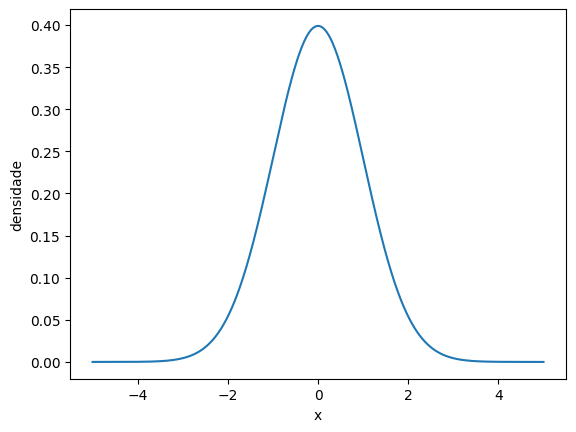

In [12]:
x = np.linspace(-5, 5, 1000)

df = pd.DataFrame({'x': x, 'densidade': norm.pdf(x)})

sns.lineplot(df, x = 'x', y = "densidade")

No caso, o que plotamos acima é a $\mathcal N(0,1)$ (Lê-se normal zero um), também chamada de normal padrão.

Uma propriedade interessante da normal é que podemos transformá-la em uma normal padrão facilmente. Por exemplo, se $Y \sim \mathcal N(\mu, \sigma^2)$, então

$$
Z = \frac{Y-\mu}{\sigma}
$$

tem distribuição $\mathcal N(0,1)$. O ato de subtrair a média e dividir pelo desvio padrão é tão comum no dia a dia de cientistas de dados que tem até um nome: **padronização**.

Por exemplo, no python:

In [23]:
tempo = camaras.tempo

media_tempos = camaras.tempo.mean()
sd_tempos = camaras.tempo.std()


tempo_padronizado = (tempo - media_tempos) / sd_tempos

tempo_padronizado.head(10)

0   -0.450363
1   -0.730058
2    1.438524
3   -0.480464
4   -1.044873
5    0.817675
6   -0.461651
7   -0.659821
8    0.208114
9    1.265439
Name: tempo, dtype: float64

Como calcular probabilidades na distribuição normal padrão?

Bem, olhando para a função densidade de probabilidades, ela é simétrica em torno do zero. Disso, é possível concluir, intuitivamente, que $\mathbb P(Z>0) = 0.5$, e que $\mathbb P(Z<=0) = 0.5$. Mas e outros valores?

Infelizmente, não há uma fórmula matemática para calcular as probabilidades de qualquer intervalo. A princípio isso é contra intuitivo, mas é verdade: é possível demonstrar, matematicamente, que não conseguimos escrever uma fórmula que calcula a área dessa função para qualquer intervalo de valores.

No entanto, é possível obter esses valores de forma computacional. Existem várias técnicas para isso, que não vamos discutir por aqui. O importante é que existe uma função no python que faz exatamente isso para nós, a `norm.cdf`. Vejamos exemplos:

In [38]:
# função auxiliar para representar as contas que estamos fazendo
def normal_pintada(a, b):
  x = np.linspace(-5, 5, 1000)
  df = pd.DataFrame({'x': x, 'densidade': norm.pdf(x)})
  sns.lineplot(df, x = 'x', y = "densidade")
  if np.isinf(a):
    a = -5
  if np.isinf(b):
    b = 5
  x_fill = np.linspace(a, b, 1000)
  y_fill = norm.pdf(x_fill)
  plt.fill_between(x_fill, y_fill, alpha=0.3)

0.5

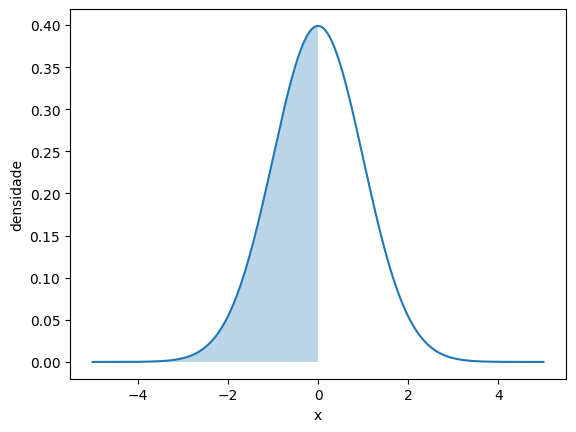

In [39]:
# Equivale a P(Z < 0)
# esperamos que seja 0.5

normal_pintada(-np.inf, 0)

norm.cdf(0)

Outro exemplo:

0.8413447460685429

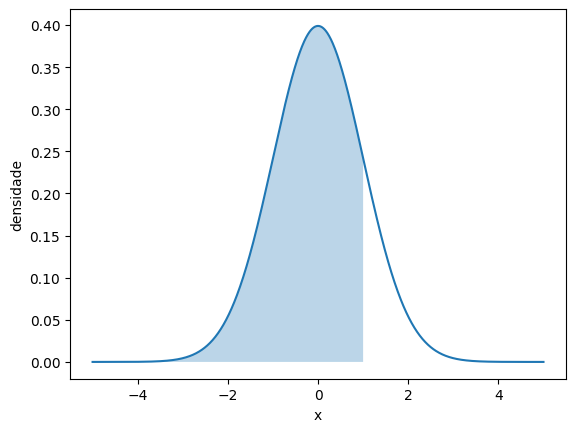

In [40]:
# P(Z < 1)
normal_pintada(-np.inf, 1)

norm.cdf(1)

0.9772498680518208

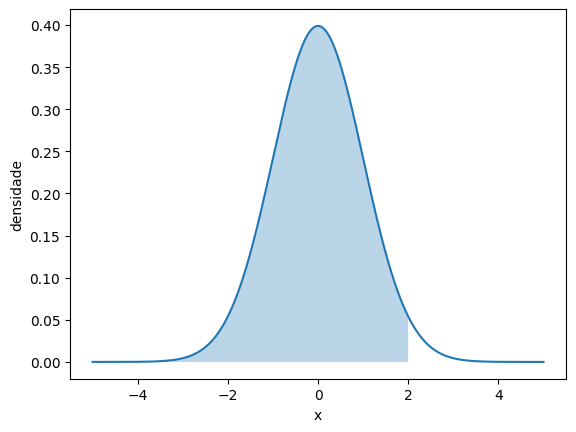

In [41]:
# P(Z < 2)

normal_pintada(-np.inf, 2)

norm.cdf(2)

0.9544997361036416

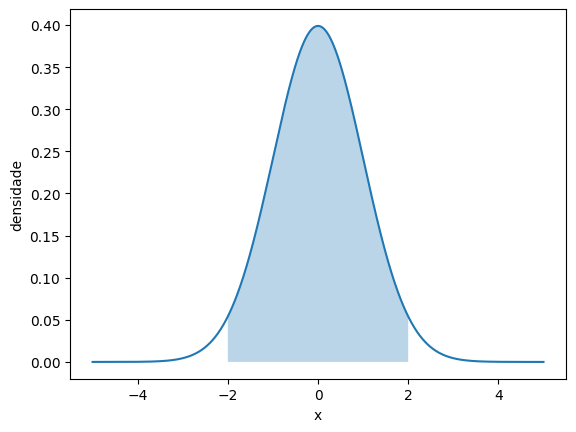

In [43]:
# P(-2 < Z < 2)
normal_pintada(-2, 2)

norm.cdf(2) - norm.cdf(-2)

Assim, com essa função, temos controle completo sobre a normal padrão. E como é fácil de transformar a normal em qualquer normal padrão, conseguimos calcular probabilidades para a distribuição normal!

Agora olhe atentamente para a última operação. Ela diz que a probabilidade de uma variável aleatória com distribuição normal padrão assumir valores entre -2 e 2 é de aproximadamente 0.95. Isso é muito conveniente, já que esse é o valor de erro que geralmente utilizamos para testes de hipótese e intervalos de confiança (mais sobre na apostila seguinte).

Podemos obter o valor exato da normal que resulta nessa probabilidade de 0.95. Esse é, vejam só, o **quantil teórico** da distribuição normal. É o mesmo conceito, mas diferente de calcular, do quantil empírico que vimos na apostila de medidas de posição e variabilidade. O quantil da distribuição normal pode ser calculado com a função `norm.ppf()`. Utilizamos como referência o valor 0.975, já que queremos deixar 0.025 para a direita e 0.025 para a esquerda, para que o meio da distribuição fique com 0.95.



In [44]:
norm.ppf(0.975)

1.959963984540054

esse valor de 1.96 é um número muito utilizado na estatística. Inclusive, esse é exatamente o valor $z_{1-\alpha/2}$ que vimos na apostila de amostragem! aqui, justamente, $\alpha=0.05$, fazendo com que $z_{1-\alpha/2} = z_{0.975}$. Então desvendamos o elemento $z$: ele é o quantil da distribuição normal padrão, ou seja, o valor de $z$ que faz com que a $\mathbb P(Z < z) = 1-\frac \alpha 2$

### Conclusões parciais

Até agora, vimos que

- Estamos buscando propriedades dos nossos **estimadores**. Estamos usando a média como exemplo.
- Sabemos que a média, pelo TCL, tem distribuição aproximadamente normal. Ou seja, ela varia mais ou menos de acordo com essa distribuição.
- Sabemos calcular probabilidades na distribuição normal padrão
- Sabemos relacionar a normal padrão com uma normal qualquer.

O próximo passo é fazer uma **inferência estatística**. Uma forma de fazer isso é criar um intervalo, de acordo com essa distribuição normal, que provavelmente vai conter o valor de $\mu$. O intervalo, chamado de intervalo de confiança, terá a seguinte fórmula:

$$
\bar X \pm z_{1-\alpha/2} \sqrt{\frac{\sigma^2}{n}}
$$

O interessante é que já vimos tudo isso: $\bar X$ é o estimador, $z_{1-\alpha/2}$ é o quantil da normal padrão, e $\sigma^2/n$ é a variância de $\bar X$, que também já vimos. A única coisa que falta é esse $\sigma$. Ele é um parâmetro populacional. Não temos acesso a ele. Mas, como vimos, podemos estimá-lo a partir da amostra, como já vimos na apostila de medidas de posição e variabilidade. Chamamos essa estimativa de $s^2$. Substituindo $\sigma^2$ por $S^2$ (o $S$ maiúsculo para denotar o estimador), temos:

$$
\bar X \pm z_{1-\alpha/2} \sqrt{\frac{S^2}{n}} = \bar X \pm z_{1-\alpha/2} \frac{S}{\sqrt n}
$$

Agora sim, a partir de um conjunto de dados, obtemos estimativas $\bar x$ e $s^2$. E podemos construir o intervalo de confiança da seguinte forma:



In [48]:
# calcular intervalo de confiança para a coluna tempo da base camaras

tempos = camaras.tempo
media = tempos.mean()
sd = tempos.std()
z = norm.ppf(0.975)
n = len(tempos)

vl_intervalo = z * sd / np.sqrt(n)

media - vl_intervalo, media + vl_intervalo

(3.136057807684683, 3.221624914728558)

Como temos muitas observações na amostra (10000), esse intervalo fica bem pequeno. Calculando, por exemplo, com base em uma amostra de 300 observações (que vimos na estimativa da apostila de amostragem):

In [51]:
tempos = camaras.tempo.sample(300, random_state=1)
media = tempos.mean()
sd = tempos.std()
z = norm.ppf(0.975)
n = len(tempos)

vl_intervalo = z * sd / np.sqrt(n)

media - vl_intervalo, media, media + vl_intervalo

(2.9557375829520214, 3.211791010723249, 3.467844438494476)

Nessa amostra, temos que o intervalo de confiança para a média dos tempos dos processos é de 2 anos e 11 meses até 3 anos e 6 meses. A estimativa pontual (média) é de aproximadamente 3 anos e 3 meses. A diferença entre a estimativa pontual e um dos limites do intervalo é próxima de 3 meses, o que está condizente com o valor de $d$ que na hora de dimensionar a amostra.